In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 25
plt.rcParams['figure.figsize'] = [50, 10] # 전역으로 차트의 크기 설정

# 한글 폰트 설정 & 폰트가 선명하게 보이도록 retina설정
plt.rc('font', family="Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

fontdictHead={'fontsize': 36, 'color': 'yellow'}

fontdictBody={'fontsize': 20, 'color': 'white'}


In [169]:
marathonDf = pd.read_csv('./marathon/marathon_merge[2015~2017].csv')

In [170]:
# 데이터프레임에서 drop을 사용하면 삭제할 컬럼을 선택하지만
# columns에 리스트로 컬럼명을 제시하면 골라내고자 하는 컬럼만 선택수집합니다.
# 선택컬럼에 sort_values() 속성을 사용하여 특정 컬럼 기준 정렬된 데이터도
# 얻을 수 있습니다.

# 아래는 컬럼 선택 후 최종 기록으로 오름차순 정렬
record = pd.DataFrame(
    marathonDf
    , columns=['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Official Time']
).sort_values(by=['Official Time'], ascending=True)

record

,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,883,1783,2697,3629,3842,4567,5520,6479,7381,7822
...,...,...,...,...,...,...,...,...,...,...
26596,2944,6012,9211,12701,13415,16160,19871,23615,27338,28837
26597,2414,5298,8806,12521,13236,16566,20624,24691,27688,29161
53225,2542,5389,8629,12294,13069,15953,19767,24124,28461,30207
53226,2158,4509,7089,10155,10822,14835,19679,24591,28752,30309


In [171]:
# insert 함수 : 데이터 프레임에 새롭게 컬럼을 추가하는 또 하나의 방법
# .insert(새로삽입되는 컬럼의 위치, 컬럼 이름, 적용될 값)
record.insert(
    0                                 # 0 : 첫번째 열에 새로운 컬럼 삽입
    , 'Rank'                          # 'Rank' : 새로 생성할 컬럼의 이름
    , range(1, len(record) + 1)       # range(1, len((record)+1) : 1부터 1씩 증가하여 인원수만큼 숫자 발생
)
record

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,1,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,2,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,3,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,4,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,5,883,1783,2697,3629,3842,4567,5520,6479,7381,7822
...,...,...,...,...,...,...,...,...,...,...,...
26596,79634,2944,6012,9211,12701,13415,16160,19871,23615,27338,28837
26597,79635,2414,5298,8806,12521,13236,16566,20624,24691,27688,29161
53225,79636,2542,5389,8629,12294,13069,15953,19767,24124,28461,30207
53226,79637,2158,4509,7089,10155,10822,14835,19679,24591,28752,30309


In [172]:
# rank 100 까지 필터링
top100 = record[record.Rank <= 100] # equal) top100 = record[record['Rank'] <= 100]
top100

,Rank,5K,10K,15K,20K,Half,25K,30K,35K,40K,Official Time
0,1,883,1783,2697,3629,3842,4567,5520,6479,7359,7757
53228,2,925,1828,2744,3675,3875,4619,5581,6499,7373,7777
1,3,883,1783,2698,3628,3841,4567,5519,6479,7362,7788
53229,4,924,1827,2744,3675,3875,4619,5581,6499,7394,7798
2,5,883,1783,2697,3629,3842,4567,5520,6479,7381,7822
...,...,...,...,...,...,...,...,...,...,...,...
41,96,1006,2023,3046,4063,4286,5092,6133,7181,8216,8747
40,97,890,1824,2821,3828,4043,4822,5864,6967,8155,8747
42,98,959,1952,2985,4015,4246,5061,6120,7197,8273,8758
53265,99,998,2007,3015,4044,4269,5075,6134,7219,8286,8760


In [173]:
xData = top100['Rank']
yData = {
    'Official Time' : top100['Official Time']
    , '10K' : top100['10K']
    , '20K' : top100['20K']
    , '30K' : top100['30K']
}

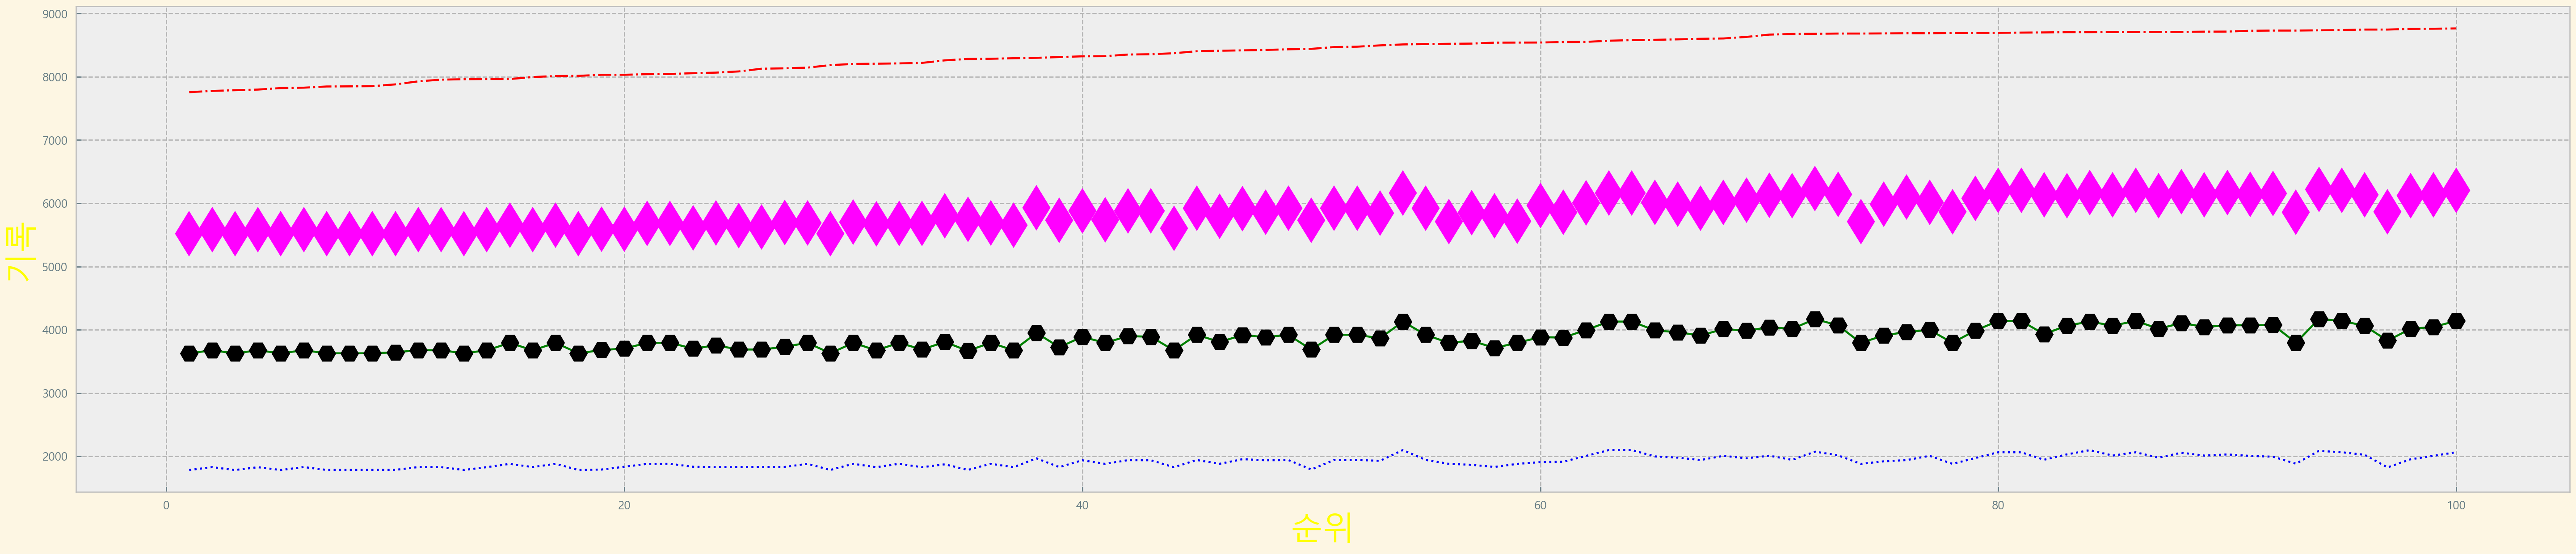

In [174]:
plt.xlabel('순위', fontdict=fontdictHead)
plt.ylabel('기록', fontdict=fontdictHead)

# linestyle = ['-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted']
# marker : ['o', '*', '^']
plt.plot(xData, yData['Official Time'], color='red', linestyle='-.', )
plt.plot(xData, yData['10K'], c='blue', linestyle=':', )
plt.plot(xData, yData['20K'], c='green', marker='H', markeredgecolor='black', markeredgewidth=10, markerfacecolor='black')
plt.plot(xData, yData['30K'], 's', c='magenta', marker='d', markeredgewidth=20, markerfacecolor='black', )

plt.style.use('seaborn-talk')
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethir <...> ', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
plt.show()